Последняя версия. Есть базовый класс-решатель двумерхных задач, каждый солвер -- наследник.

Heston model:
$$
\begin{cases}
&\dfrac{dS_t}{S_t} = r dt + \sqrt{v} dW^1_t\\
&d v_t = \kappa(\theta - v_t) dt + \sigma \sqrt{v} dW^2_t\\
&S_t = s, v_t = v; dW^1dW^2 = \rho dt
\end{cases}
$$
In this variables PDE for put option price read as follow:
$$
\begin{cases}
&V_t + s r V_s + \kappa (\theta - v) V_v + 0.5 s^2 v V_{ss} + 0.5 \sigma^2 v V_{vv} + \rho S \sigma v V_{sv} = rV, s \geq 0, v \geq 0, 0 \leq t \leq T\\
&V(T, s, v) = G(s, v) = (K-s)^+\\
&V(t, 0, v) = K\\
&V(t, \infty, v) = 0\\
&V_v(t, s, 0) = V_v(t, s, \infty) = 0
\end{cases}
$$
Consider the following variable transformition:
$$
X_t = \log S_t - \log K, v_t = y_t \sigma
$$
In new variables:
$$
\begin{cases}
&d X_t = (r - 0.5 y_t \sigma) dt + \sqrt{\sigma y_t} dW^1_t \\
&d y_t = \kappa \dfrac{\theta - y_t \sigma}{\sigma} + \sqrt{\sigma y_t} dW^2_t
\end{cases}
$$In this variables PDE reads as follow:
$$
V_t + (r-0.5 y\sigma) V_x + \kappa \dfrac{\theta - y \sigma}{\sigma} V_y + 0.5 \sigma y (V_{xx} + V_{yy}) + \rho \sigma y_t V_{xy} = r V
$$
Consider change $t = T-t, H = e^{rt}V / K$, then we have:
$$
\begin{cases}
&H_t = (r-0.5 y\sigma) H_x + \kappa \dfrac{\theta - y \sigma}{\sigma} H_y + 0.5 \sigma y (H_{xx} + H_{yy}) + \rho \sigma y_t H_{xy}\\
&H(0, x, y) = (1-e^{x})^+\\
&H(t, -\infty, v) = 1\\
&H(t, \infty, v) = 0\\
&H_y(t, x, 0) = H_y(t, x, \infty) = 0
\end{cases}
$$

Ограничим области до прямоугольника $x \in [-X, X], y\in [0, Y]$. Условия на бесконечности перенесём в конечную точку, при этом положим $H(t, -X, y) = 1-e^{-X}$, что вполне логично, так как если $x = -X$, то опцион глубоко в деньгах, и с вероятностью, близкой к единице он будет исполнен. Для удобства будем обозначать неизвестную функцию на текущем слое через $u$, а на следующем через $\hat{u}$. Для индексации пространственных переменных $x, y$ будем использовать соответственно индексы $n, m$. По умолчанию подразумеваются индексы $n, m$. 

Введём сеточные функции $u_{n, m}(t) = u(t) = H(t, x_n, y_m)$. Аппроксимируем производные в правой части конечными разностями, получим выражение:
$$\begin{cases}
&\dfrac{du}{dt} = \mu_x u_x + \mu_y u_y + 0.5 \sigma y (u_{xx} + u_{yy}) + \rho \sigma y u_{xy} = F(u)\\
&u(0) = \left( 1 - e^{x_n}\right)^+\\
&u_{0, m} = 1-e^{-X}, m=\overline{0, M}\\
&u_{N, m} = 0, m=\overline{0, M}\\
&u_{n, 0} = u_{n, 1}, n=\overline{0, N}\\
&u_{n, M-1} = u_{n, M}, n=\overline{0, N}
\end{cases}
$$Получили ОДУ. Построим явную схему, например, схему эйлера. На каждом шаге будем находить значения $u_{n, m}$ при $n\in \{1, N-1\}, m\in \{1, M-1\}$, затем будем восстанавливать граничные условия. Для схемы эйлера получим:
$$
\hat{u} = u + \tau * F(u)
$$где $\tau$ -- шаг по времени. Аналогично можно построить схему более высокого порядка, например схему Рунге-Кутты 4 порядка по времени. Главный недостаток явных схем является их условная устойчивость, они накладывают ограничения на шаг по времени $\tau \leq h^2$. Поэтому на практике они не применимы. Неявные схемы применять сложно, так как при переходе со слоя на слой приходится решать слау порядка $N_x N_y$.

Запишем правую часть в виде:
$$
F(u) = \Lambda_x u + \Lambda_y y + \Lambda_{xy}
$$где в оператор $\Lambda_x$ вошли производные по $x$, в $\Lambda_y$ -- по $y$, а $\Lambda_{xy}$ соответствует смешанной частной производной. Мы уже знаем, как решать задачу, когда $\Lambda_{xy} = 0$, это стандартный метод переменных направлений (alternating direction method). Покажем, как адаптировать его для данной задачи. Точное решение можно записать через матричную экспоненту:
$$
\hat{u} = \exp\left( \tau(\Lambda_{x} + \Lambda_{y} + \Lambda_{xy}) \right) u 
\approx \exp(\tau(\Lambda_{x} + \Lambda_{y}))  \exp(\tau \Lambda_{xy}) u
$$Это равенство верно лишь приближённо, так как операторы не коммутируют. Видно, что такая запись оператора перехода соответствует тому, что мы вначале делаем шаг для уравнения, у которого в правой части стоит только $\Lambda_{xy}$, а затем делаем ещё один шаг, в котором в правой части смешанных производных нет. Для решения задачи с оператором $\Lambda_{xy}$ мы будем использовать явную схему, так как тяжело построить экономичную неявную схему. Это соответствует тому, что экспонента аппроксиммируется следующим образом:
$$
 \exp(\tau \Lambda_{xy}) \approx I + \tau \Lambda_{xy}
$$
Можно рассмотреть симметричный случай:
$$
\exp\left( \tau(\Lambda_{x} + \Lambda_{y} + \Lambda_{xy}) \right) 
\approx \exp(0.5 \tau \Lambda_{xy})  \exp(\tau(\Lambda_{x} + \Lambda_{y}))  \exp(0.5 \tau \Lambda_{xy}) u + O(\tau^3)
$$Нетрудно показать, что он даёт глобальную ошибку порядка $O(\tau^2)$. 

Его мы и будем использовать. Таким образом, все вычисления, соответствующие смешанным производным, будут производиться по явным схемам. 

Запишем это всё так:

$$
\begin{aligned}
&y_1 = (I+ 0.5 \tau \Lambda_{xy}) u\\
&(I - 0.5 \tau \Lambda_x) y_2 = (I + 0.5 \tau \Lambda_y) y_1\\
&(I - 0.5 \tau \Lambda_y) y_3 = (I + 0.5 \tau \Lambda_x) y_2\\
&\hat{u} = (I + 0.5 \tau \Lambda_{xy}) y_3
\end{aligned}
$$Матрицы $\Lambda_x, \Lambda_y$ трехдиагональны и не зависят от времени, так что для них можно один раз найти $LU$ разложение, а затем решать СЛАУ. Рассмотрим подробнее метод прогонки:

$$
\Lambda_x = \sigma_x \dfrac{u_{n+1} - 2u_{n} + u_{n + 1}}{2 h_x^2} + \mu_x \dfrac{u_{n+1} - u_n}{2h_x}
$$
Таким образом, 
$$\left[\left(I - 0.5 \tau \Lambda_x\right) z \right]_n = 
    z_n     \left(1 + \dfrac{\tau \sigma_x}{2 h_x^2} \right)
  + z_{n-1} \left( -\dfrac{\tau \sigma_x }{4 h_x^2} + \dfrac{\tau \mu_x}{4 h_x} \right)
  + z_{n+1} \left( -\dfrac{\tau \sigma_x }{4 h_x^2} - \dfrac{\tau \mu_x}{4 h_x} \right)
$$То есть
$$
\begin{aligned}
&A^x_n = 1 + \dfrac{\tau \sigma_x}{2 h_x^2} \\
&B^x_n =  -\dfrac{\tau \sigma_x }{4 h_x^2} - \dfrac{\tau \mu_x}{4 h_x} \\
&C^x_n =  -\dfrac{\tau \sigma_x }{4 h_x^2} + \dfrac{\tau \mu_x}{4 h_x}
&
\end{aligned}
$$коэффициенты трёхдиагональной системы, соответствующие направлению $x$. Так как по $x$ у нас условия Дирихле, их нужно дополнить граничными значениями 
$$\begin{aligned}
&A^x_0 = A^x_N = 1.0, \\
&B^x_0 = C^x_{N} = 0.0, \\
&F_0 = 1 - e^{-X}, F_N = 0.0
\end{aligned}
$$Аналогично для направления $y$ имеем:
$$
\begin{aligned}
&A^y_n = 1 + \dfrac{\tau \sigma_y}{2 h_y^2} \\
&B^y_n =  -\dfrac{\tau \sigma_y }{4 h_y^2} - \dfrac{\tau \mu_y}{4 h_y} \\
&C^y_n =  -\dfrac{\tau \sigma_y }{4 h_y^2} + \dfrac{\tau \mu_y}{4 h_y}
\end{aligned}
$$И граничные условия:
$$\begin{aligned}
&A^y_0 = A^y_N = 1.0, \\
&B^y_0 = C^y_{N} = -1.0, \\
&F_0 = F_N = 0.0
\end{aligned}
$$

На каждом шаге нам нужно будет лишь вызвать солвер прогонки с соответствующей правой частью и коэффициентами. Такой подход хорош тем, что он требует минимальных изменений при использовании неравномерной сетки: достаточно только поменять соответствующие коэффициенты $A, B, C$ и функцию вычисления правой части $F$.

Во избежания путаницы с индексами, будем обозначать шаги по $x$ буквой $k$, шаги по $y$ буквой $\delta$.

Неравномерные сетки:

$$
u_x = \dfrac{1}{h_1 + h_2} \left( \dfrac{h_1}{h_2} (\hat{u} - u) + \dfrac{h_2}{h_1} (u - \check{u})  \right)
$$

$$
u_{xx} = \dfrac{1}{h_1 + h_2} \left( \dfrac{\hat{u} - u}{h_2} - \dfrac{u - \check{u}}{h_1} \right)
$$

$$
u_{xy} = \dfrac{1}{h_1 + h_2} \left( \dfrac{h_1}{h_2} (\hat{u}_y - u_y) + \dfrac{h_2}{h_1} (u_y - \check{u_y})  \right)
$$

Посчитаем теперь коэффициенты матрицы перехода $A_n, B_n, C_n:$
$$
    \Lambda_x = \sigma_x \dfrac{0.5}{h_1 + h_2} \left( \dfrac{\hat{u} - u}{h_2} - \dfrac{u - \check{u}}{h_1} \right) + \mu_x \dfrac{1}{h_1 + h_2} \left( \dfrac{h_1}{h_2} (\hat{u} - u) + \dfrac{h_2}{h_1} (u - \check{u})  \right)
    $$
    Таким образом, 
    $$\left[\left(I - 0.5 \tau \Lambda_x\right) z \right]_n = 
        z_n     \left(1 + \dfrac{\tau \sigma_x}{2 h_x^2} \right)
      + z_{n-1} \left( -\dfrac{\tau \sigma_x }{4 h_x^2} + \dfrac{\tau \mu_x}{4 h_x} \right)
      + z_{n+1} \left( -\dfrac{\tau \sigma_x }{4 h_x^2} - \dfrac{\tau \mu_x}{4 h_x} \right)
    $$То есть
    $$
    \begin{aligned}
    &A = 1 + \dfrac{\tau}{2 h_1 h_2} \left( \sigma_x - \mu(h_2 - h_1)  \right) \\
    &B =  -\dfrac{\tau}{2 h_2 (h_1+h_2)} \left( \sigma_x + h_1 \mu_x \right)\\
    &C =  -\dfrac{\tau}{2 h_1 (h_1+h_2)} \left( \sigma_x - h_2 \mu_x \right)
    &
    \end{aligned}
$$

Аналогично происходят вычисления для $y$.

Допустим, мы знаем функцию $F(S) = (1-\dfrac{S}{K_0})^+$, т.е. выплату опциона для фиксированного страйка, как функцию от переменной $S$. Хотим узнать, какому страйку это соответствует, при $S = S_0$. Имеем:
$$
\dfrac{S}{K_0} = \dfrac{S_0}{K}
$$откуда $K = K_0 \dfrac{S_0}{S}$. Таким образом, если есть ряд цен
$$
F(S_1), F(S_2), \ldots, F(S_n)
$$опционов со страйком $K_0$, их можно интепретировать, как ряд цен с ценой $S_0$ и страйком 
$$
K_i = K_0 \dfrac{S_0}{S_i}
$$

In [3]:
from sys import path

path.append("../../heston")

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from montecarlo import *
from heston import *

In [6]:
from solver import *

In [7]:
#model params
r = 0.025
sigma = 0.3
kappa = 1.5
theta =  0.04
rho = -0.9

#Option params:
K = 1.0
T = 1.0

#initial price
S0 = 1.0
#initial vol
v0 = 0.0175

Smin = 0.02 * K
Smax = 4.0 * K

In [8]:
def gridX(Nx):
    
    Smed = 2 * K
    N1 = int(0.8 * Nx)
    N2 = Nx - N1
    Sn1 = np.linspace(Smin, Smed, N1 + 1)
    Sn2 = np.linspace(Smed, Smax, N2 + 1)
    
    Sn = np.r_[Sn1, Sn2[1:]]
    
    xn = np.log(Sn / K)
    hx = np.diff(xn)
    return xn, hx

def gridY(Ny):
    Y = max(2.5, theta / sigma * 5.0)
    yn = yn = Y * (np.linspace(0, 1, Ny + 1) ** 3 )
    hy = np.diff(yn)
    return yn, hy

def gridT(Nt):
    return T * (np.linspace(0, 1.0, Nt + 1) ** 1)

In [9]:
Xleft = Dirichle(lambda x: 1.0 - Smin / K)

Xright = Dirichle(lambda x: 0.0)

Yleft = Neuman(lambda x: 0.0)

Yright = Neuman(lambda x: 0.0)

boundary = Boundary2D(Xleft, Xright, Yleft, Yright)

init = lambda x, y: np.maximum(0, 1.0 - np.exp(x))

mux = lambda x, y: (r - 0.5 * y * sigma)
muy = lambda x, y:kappa * (theta - y * sigma) / sigma 

sigmax = lambda x, y: 0.5 * sigma * y
sigmay = lambda x, y: 0.5 * sigma * y
sigmaxy = lambda x, y: sigma * y * rho

problem = Problem(boundary, init, mux, muy, sigmax, sigmay, sigmaxy)

der = DerCntrl()

In [10]:
solverDO = ADI_DO(problem, der, gridX, gridY, gridT)

solverCS = ADI_CS(problem, der, gridX, gridY, gridT)

solverMCS = ADI_MCS(problem, der, gridX, gridY, gridT)

solverHV = ADI_HV(problem, der, gridX, gridY, gridT)

In [11]:
def GetPFromU(u):
    vn = yn * sigma

    iy = np.where( vn <= v0 )[0][-1]
    
    H = 0.5 * (u[-1, :, iy] + u[-1, :, iy + 1])
    return np.exp(-r * T) * K * H

In [12]:
Nx = 20
Ny = 10
M = 10

In [13]:
xn, hx = gridX(Nx)
yn, hy = gridY(Ny)
tn = gridT(M)

In [14]:
uDO = solverDO.solve(Nx, Ny, M)
uCS = solverCS.solve(Nx, Ny, M)
uMCS = solverMCS.solve(Nx, Ny, M)
uHV = solverHV.solve(Nx, Ny, M)

In [15]:
Sn = K * np.exp(xn)

pDO = GetPFromU(uDO)
pCS = GetPFromU(uCS)
pMCS = GetPFromU(uMCS)
pHV = GetPFromU(uHV)

In [16]:
Nu = 100
P_exact = getOptionPrice(Sn, K, Nu, T, r, kappa, sigma, theta, rho, v0, False)
P_exact = P_exact.squeeze()

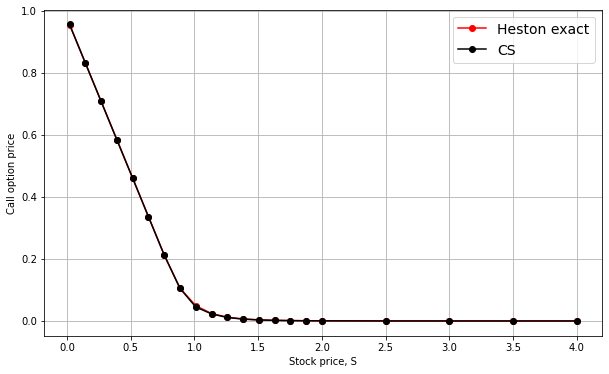

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(Sn, P_exact, '-or',label="Heston exact")
plt.plot(Sn, pCS, '-ok', label="CS")
plt.legend(fontsize=14)
plt.xlabel("Stock price, S")
plt.ylabel("Call option price")
plt.grid()

In [18]:
names = ["DO", "CS", "MCS", "HV"]
prices = [pDO, pCS, pMCS, pHV]

for name, price in zip(names, prices):
    err = np.linalg.norm(P_exact - price) / np.linalg.norm(P_exact) * 100
    print(f'{name}, error = {err:1.8}%,')

DO, error = 0.29230041%,
CS, error = 0.27880218%,
MCS, error = 0.27880218%,
HV, error = 0.27882827%,


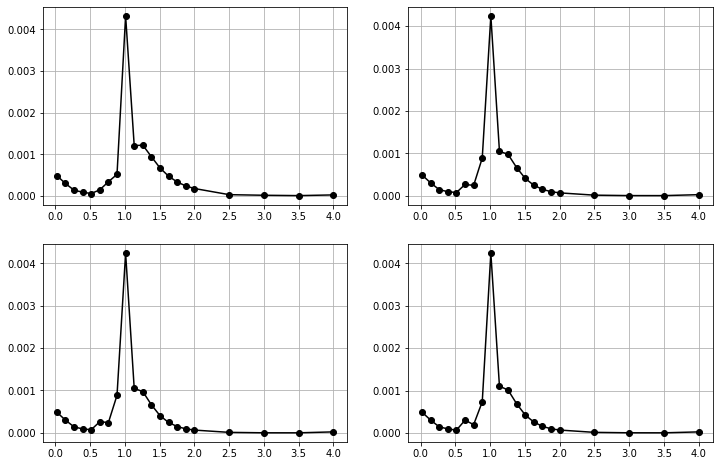

In [19]:
names = ["DO", "CS", "MCS", "HV"]
prices = [pDO, pCS, pMCS, pHV]

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax1.plot(Sn, np.abs(P_exact - pDO), '-ok')
ax1.grid()

ax2 = fig.add_subplot(222)
ax2.plot(Sn, np.abs(P_exact - pCS), '-ok')
ax2.grid()

ax3 = fig.add_subplot(223)
ax3.plot(Sn, np.abs(P_exact - pMCS), '-ok')
ax3.grid()

ax4 = fig.add_subplot(224)
ax4.plot(Sn, np.abs(P_exact - pHV), '-ok')
ax4.grid()

In [20]:
Smin = 0.01 * K
Smax = 4 * K

In [21]:
def gridX(Nx):
    sn = np.linspace(Smin, Smax, Nx + 1)
    xn = np.log(sn / K)
    hx = np.diff(xn)
    return xn, hx

def gridY(Ny):
    Y = max(5.0, theta / sigma * 5.0)
    yn = Y * (np.linspace(0, 1, Ny + 1) ** 1 )
    hy = np.diff(yn)
    return yn, hy

def gridT(Nt):
    return T * (np.linspace(0, 1.0, Nt + 1) ** 1.5)


Sleft = Dirichle(lambda v: 0.0)

Sright = Neuman(lambda v: Smax / K)

Vleft = Neuman(lambda x: 0.0)

Vright = Dirichle(lambda x: np.exp(x))

Vright = Neuman(lambda x: 0.0)

boundary = Boundary2D(Sleft, Sright, Vleft, Vright)

init = lambda x, y: np.maximum(0, np.exp(x) - 1.0)

mux = lambda x, y: (r - 0.5 * y * sigma)
muy = lambda x, y:kappa * (theta - y * sigma) / sigma 

sigmax = lambda x, y: 0.5 * sigma * y
sigmay = lambda x, y: 0.5 * sigma * y
sigmaxy = lambda x, y: sigma * y * rho

problem = Problem(boundary, init, mux, muy, sigmax, sigmay, sigmaxy)

der = DerCntrl()

solverDO = ADI_DO(problem, der, gridX, gridY, gridT)
solverCS = ADI_CS(problem, der, gridX, gridY, gridT)
solverMCS = ADI_MCS(problem, der, gridX, gridY, gridT)
solverHV = ADI_HV(problem, der, gridX, gridY, gridT, th=1.0)

In [22]:
def InverseTransform(u, vn, v0, r, T, K):
    iy = np.where( vn <= v0 )[0][0]
    H = 0.5 * (u[-1, :, iy] + u[-1, :, iy + 1])
    return np.exp(-r * T) * H * K

In [23]:
Nx = 500
Ny = 400
Nt = 15

xn, hx = gridX(Nx)
yn, hy = gridY(Ny)
tn = gridT(Nt)

sn = np.exp(xn) * K
vn = sigma * yn

In [24]:
Nu = 200
cExact = getOptionPrice(sn, K, Nu, T, r, kappa, sigma, theta, rho, vn, True)
cExact = cExact.squeeze()

In [25]:
#uDO = solverDO.solve(Nx, Ny, Nt)
#uCS = solverCS.solve(Nx, Ny, Nt)
uMCS = solverMCS.solve(Nx, Ny, Nt)
#uHV = solverHV.solve(Nx, Ny, Nt)

#cDO = InverseTransform(uDO, vn, v0, r, T, K)
#cCS = InverseTransform(uCS, vn, v0, r, T, K)
cMCS = InverseTransform(uMCS, vn, v0, r, T, K)
#cHV = InverseTransform(uHV, vn, v0, r, T, K)

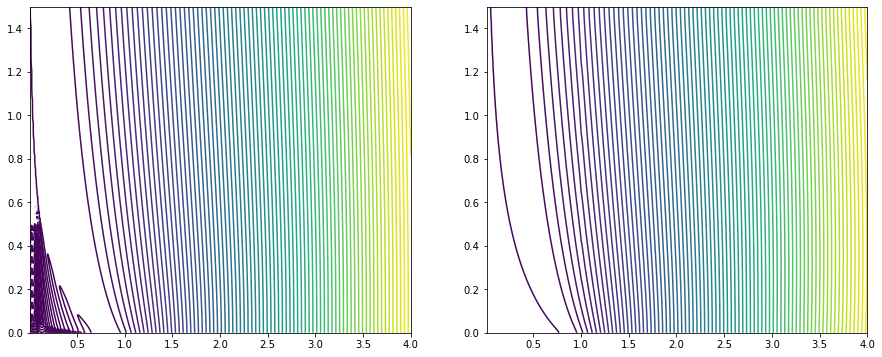

In [26]:
fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(121)
ax1.contour(sn, vn, cExact.T, levels=100)
ax2 = plt.subplot(122)
ax2.contour(sn, vn, K * np.exp(-r * T) * uMCS[-1].T, levels=100)

In [27]:
Smin = 0.001 * K
Smax = 6 * K

In [28]:
def gridS(Ns):
    c = K / 5
    ximin = np.arcsinh( (Smin - K) / c )
    ximax = np.arcsinh( (Smax - K) / c )
    xi = np.linspace( ximin, ximax, Ns + 1 )
    sn = K + c * np.sinh(xi)
    hs = np.diff(sn)
    return sn, hs

def gridV(Nv):
    Vmax = 5.0
    c = Vmax / 50
    ximin = np.arcsinh( (0.0) / c )
    ximax = np.arcsinh( (Vmax) / c )
    xi = np.linspace( ximin, ximax, Nv + 1 )
    vn = c * np.sinh(xi)
    hv = np.diff(vn)
    return vn, hv

def gridT(Nt):
    return T * (np.linspace(0, 1.0, Nt + 1) ** 1.5)


Sleft = Dirichle(lambda v: 0.0)

Sright = Neuman(lambda v: 1.0)

Vleft = Neuman(lambda x: 0.0)

Vright = Dirichle(lambda x: x)

boundary = Boundary2D(Sleft, Sright, Vleft, Vright)

init = lambda s, v: np.maximum(0.0, s - K)

mux = lambda s, v: s * r
muy = lambda s, v: kappa * (theta - v )

sigmax = lambda s, v: 0.5 * (s ** 2) * v
sigmay = lambda s, v: 0.5 * (sigma ** 2) * v
sigmaxy = lambda s, v: s * v * sigma * rho

problem = Problem(boundary, init, mux, muy, sigmax, sigmay, sigmaxy)

der = DerCntrl()

solverDO = ADI_DO(problem, der, gridS, gridV, gridT)

In [29]:
Ns = 10
Nv = 10
Nt = 150

sn, hs = gridS(Ns)
vn, hv = gridV(Nv)
tn = gridT(Nt)

In [30]:
uDO = solverDO.solve(Ns, Nv, Nt)

cDO = InverseTransform(uDO, vn, v0, r, T, K) / K

In [31]:
Nu = 200
cExact = getOptionPrice(sn, K, Nu, T, r, kappa, sigma, theta, rho, v0, True)

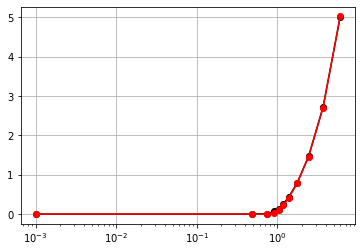

In [32]:
plt.semilogx(sn, cDO, '-ok', sn, cExact, '-or')
plt.grid()